<a href="https://colab.research.google.com/github/AadiPatangi/Dogs-v-Cat-Classifier-using-TF-Datasets/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import tensorflow as tf
! pip install tensorflow_datasets
import tensorflow_datasets as tfds
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

In [92]:
(ds_train, ds_test), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:10%]', 'train[10%:]'],
    with_info=True,
    as_supervised=True,
)

In [93]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [94]:
print("Training Set Size: %d" % ds_train.cardinality().numpy())
print("Test Set Size: %d" % ds_test.cardinality().numpy())

Training Set Size: 2326
Test Set Size: 20936


In [95]:
num_classes = info.features['label'].num_classes
print("Number of Classes: %d" % num_classes)



Number of Classes: 2


350
336
500
500
320


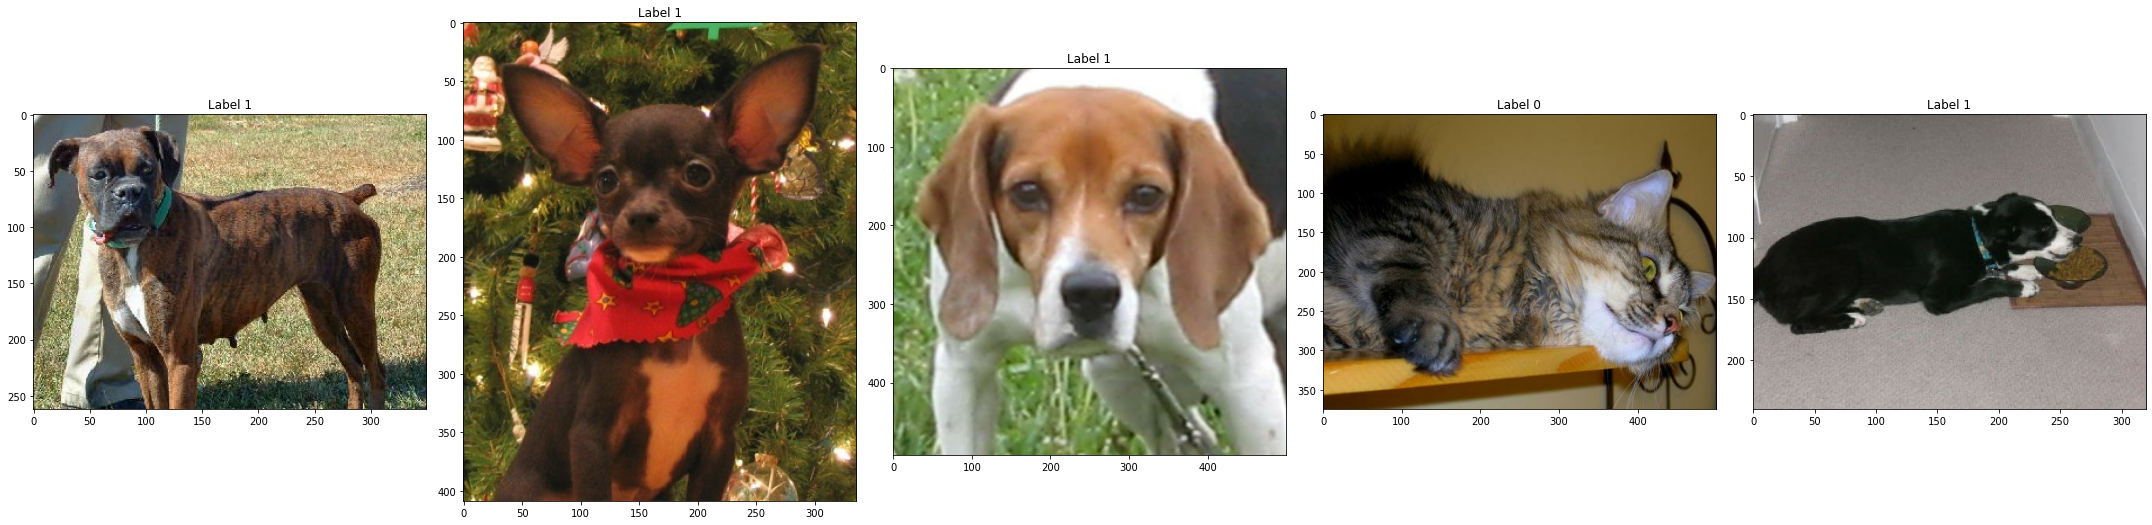

In [96]:
ctr = 0
plt.rcParams["figure.figsize"] = [30, 15]
plt.rcParams["figure.autolayout"] = True
  
for image, label in ds_train:
    image = image.numpy()
    print(image.shape[1])
    plt.subplot(1, 5, ctr+1)
    plt.title('Label {}'.format(label))
    plt.imshow(image, cmap=plt.cm.binary)
    ctr += 1
    if ctr == 5:
        break
  
plt.show()

In [97]:
for i, example in enumerate(ds_train.take(10)):
    shape = example[0].shape
    print("Image %d -> shape: (%d, %d) label: %d" %
          (i, shape[0], shape[1], example[1]))



Image 0 -> shape: (262, 350) label: 1
Image 1 -> shape: (409, 336) label: 1
Image 2 -> shape: (493, 500) label: 1
Image 3 -> shape: (375, 500) label: 0
Image 4 -> shape: (240, 320) label: 1
Image 5 -> shape: (100, 100) label: 1
Image 6 -> shape: (216, 182) label: 0
Image 7 -> shape: (375, 500) label: 0
Image 8 -> shape: (377, 500) label: 1
Image 9 -> shape: (500, 375) label: 1


In [98]:
min_shape = (1000,1000)
max_shape = (0,0)
add_shape = [0,0]
cnt = 0




for i, example in enumerate(ds_train):
    cnt = cnt +1
    shape = example[0].shape
    min_shape_area = min_shape[0]*min_shape[1]
    area = shape[0] * shape[1]
    if area < min_shape_area:
        min_shape = shape
    max_shape_area = max_shape[0]*max_shape[1]
    if area > max_shape_area:
        max_shape = shape
        
        
    add_shape[0] = add_shape[0] + shape[0]
    add_shape[1] = add_shape[1] + shape[1]
    
    
          
        
        
        
add_shape[0] = add_shape[0] / cnt
add_shape[1] = add_shape[1] / cnt
  
       
print("Image %d -> shape: (%d, %d) " %
        (i, min_shape[0], min_shape[1] ))
print("Image %d -> shape: (%d, %d) " %
        (i, max_shape[0], max_shape[1] ))
print(add_shape)

print(cnt)

Image 2325 -> shape: (47, 65) 
Image 2325 -> shape: (500, 500) 
[366.71453138435083, 411.1904557179708]
2326


In [99]:
IMG_SIZE = 100
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [100]:
def format_image(image, label):
  
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
      
    # Normalisation
    image = image/255.0
    return image, label
  
batch_size = 32
ds_train = ds_train.shuffle(300).map(
    format_image).batch(batch_size).prefetch(1)
ds_test = ds_test.map(format_image).batch(batch_size).prefetch(1)

In [101]:
print(ds_train)
print(ds_test)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [102]:

# def getModel(image_shape):
#     mobileNet = tf.keras.applications.mobilenet.MobileNet(image_shape)
#     X = mobileNet.layers[-2].output
#     X_output = tf.keras.layers.Dense(1,
#                                      activation='relu')(X)
#     model = tf.keras.models.Model(inputs=mobileNet.input,
#                                   outputs=X_output)
#     return model
  
# model = getModel((IMG_SIZE, IMG_SIZE, 3))
  
# optimizer = tf.keras.optimizers.Adam()
# loss = 'mean_squared_error'
# model.compile(optimizer=optimizer, 
#               loss=loss,
#               metrics='accuracy')
  
# epochs = 5
# model.fit(ds_train, epochs=epochs, 
#           validation_data=ds_test)

In [103]:
# def make_model():
#       model = keras.Sequential([
#          keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
#          keras.layers.Dense(512, activation='relu'),
#          keras.layers.Dense(4),
        
         
#       ])
#       model.compile(optimizer='adam',
#                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                    metrics=['accuracy'])
#       return model

# model=make_model()
# #history = model.fit(istrain, isclas, epochs=10)
# history = model.fit(ds_train,epochs = 10 , validation_data = (ds_test))

In [104]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(4))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(ds_train, epochs=30, 
#                     validation_data=(ds_test))

In [114]:

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', #rmsprop
              metrics=['accuracy'])
history = model.fit(ds_train, epochs=30, 
                    validation_data=(ds_test))
model.save('saved_model2/my_model')

Epoch 1/30
73/73 [==============================] - 21s 274ms/step - loss: 0.6915 - accuracy: 0.5383 - val_loss: 0.6758 - val_accuracy: 0.5368
Epoch 2/30
73/73 [==============================] - 19s 260ms/step - loss: 0.6604 - accuracy: 0.6079 - val_loss: 0.6535 - val_accuracy: 0.6284
Epoch 3/30
73/73 [==============================] - 19s 259ms/step - loss: 0.6116 - accuracy: 0.6737 - val_loss: 0.5940 - val_accuracy: 0.6829
Epoch 4/30
73/73 [==============================] - 19s 258ms/step - loss: 0.5856 - accuracy: 0.7094 - val_loss: 0.5812 - val_accuracy: 0.6833
Epoch 5/30
73/73 [==============================] - 20s 275ms/step - loss: 0.5426 - accuracy: 0.7356 - val_loss: 0.5973 - val_accuracy: 0.6942
Epoch 6/30
73/73 [==============================] - 19s 259ms/step - loss: 0.5195 - accuracy: 0.7597 - val_loss: 0.5746 - val_accuracy: 0.7068
Epoch 7/30
73/73 [==============================] - 19s 259ms/step - loss: 0.4837 - accuracy: 0.7678 - val_loss: 0.5558 - val_accuracy: 0.7197

In [115]:
from google.colab import files
import os

dir_to_zip = '/content/saved_model2' #@param {type: "string"}
output_filename = 'model2.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
